In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'HPE'
# ticker = 'AAPL'


''' время '''
stime='1990-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,HPE
Date,
2022-11-01 00:00:00-04:00,16.656919
2022-12-01 00:00:00-05:00,15.842935
2023-01-01 00:00:00-05:00,16.170000


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,HPE
Date_index,
2015-11-01,7.102743
2015-12-01,7.265255
2016-01-01,6.600820


In [7]:
# df.loc['1999-01-01']

In [8]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [9]:
# df_st_gr

In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,21.76929,0.663102,3.508785,1.123759,3.18029,15.174943,1.354469,15.174943,10.444614,21965020916.299999,31286020916.299999,25.305324,0.770811,4.782282,14.932033,1.10577,1.10577,1.097909,8.827884,6.811674,21.268539,0.039517,0.06697,0.43818,0.651471,2.630079,0.884871,4.159574,5.291475,0.028272,0.715438,0,0.071764,0.31749,-0.67973,-0.109559,-1.258871,0.013721,15.046824,0.023035,0.022264,-18.910046,-2668000000,1773000000,-16708000000,0.678816,7767000000,7860500000,4836000000,97.641599,167.54634,99.197736,3.738161,2.178502,3.679519,0.043697,-2.385027
2021,FY,21.225363,2.618029,4.485103,2.57372,3.052712,15.256684,0.526356,15.256684,11.297937,18784150523.600002,29366150523.600002,5.481223,0.676078,3.199481,5.575586,0.940571,0.940571,1.056945,4.592049,5.001899,8.716578,0.182441,0.179353,0.542487,0.653079,1.65473,0.912554,5.364929,1.71316,0.033273,0.182375,0,0.071228,0.33498,-0.426162,-0.090052,-0.963419,0.013749,29.978408,0.030585,0.089312,-19.478419,-1809000000,689000000,-18804000000,0.729958,7911000000,7004000000,4511000000,103.92726,138.877662,89.445621,3.512072,2.628212,4.080692,0.171599,-1.911383
2020,FY,20.851623,-0.248841,1.731066,-0.11051,4.948223,12.402628,-2.33694,12.402628,12.464451,14285759999.999998,26181760000,-44.365714,0.529455,6.377571,-99.90042,0.890134,0.890134,0.970342,11.993477,11.688286,-183.089231,-0.02254,-0.01001,0.7593,0.702009,5.449382,0.883552,None,-6.956522,0.04326,-1.919255,0.171374,0.069454,0.353976,-1.063839,-0.088318,-0.90781,0.010155,8.333144,-0.009326,-0.009228,-19.160742,-2182000000,-3024000000,-21363000000,1.004985,7545500000,6193500000,3592500000,97.127715,106.130557,52.720251,3.757939,3.43916,6.923336,-0.020064,-1.841577


In [11]:
df_key_metr.iloc[0]['netIncomePerShare']

0.6631016042780749

In [12]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015']

In [13]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [14]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [15]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [16]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [17]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[16.170000076293945,
 15.81650161743164,
 11.578455924987793,
 12.510037422180176,
 13.583499908447266,
 13.926486015319824,
 11.007373809814453,
 6.600820064544678]

In [18]:
df_key_metr[ticker] = list(stock_year_prices)

In [19]:
df_key_metr.drop('period', axis=1, inplace=True)

In [20]:
df_key_metr.head(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,HPE
2022,21.76929,0.663102,3.508785,1.123759,3.18029,15.174943,1.354469,15.174943,10.444614,21965020916.299999,31286020916.299999,25.305324,0.770811,4.782282,14.932033,1.10577,1.10577,1.097909,8.827884,6.811674,21.268539,0.039517,0.06697,0.43818,0.651471,2.630079,0.884871,4.159574,5.291475,0.028272,0.715438,0,0.071764,0.31749,-0.67973,-0.109559,-1.258871,0.013721,15.046824,0.023035,0.022264,-18.910046,-2668000000,1773000000,-16708000000,0.678816,7767000000,7860500000,4836000000,97.641599,167.54634,99.197736,3.738161,2.178502,3.679519,0.043697,-2.385027,16.170000
2021,21.225363,2.618029,4.485103,2.57372,3.052712,15.256684,0.526356,15.256684,11.297937,18784150523.600002,29366150523.600002,5.481223,0.676078,3.199481,5.575586,0.940571,0.940571,1.056945,4.592049,5.001899,8.716578,0.182441,0.179353,0.542487,0.653079,1.65473,0.912554,5.364929,1.71316,0.033273,0.182375,0,0.071228,0.33498,-0.426162,-0.090052,-0.963419,0.013749,29.978408,0.030585,0.089312,-19.478419,-1809000000,689000000,-18804000000,0.729958,7911000000,7004000000,4511000000,103.92726,138.877662,89.445621,3.512072,2.628212,4.080692,0.171599,-1.911383,15.816502
2020,20.851623,-0.248841,1.731066,-0.11051,4.948223,12.402628,-2.33694,12.402628,12.464451,14285759999.999998,26181760000,-44.365714,0.529455,6.377571,-99.90042,0.890134,0.890134,0.970342,11.993477,11.688286,-183.089231,-0.02254,-0.01001,0.7593,0.702009,5.449382,0.883552,None,-6.956522,0.04326,-1.919255,0.171374,0.069454,0.353976,-1.063839,-0.088318,-0.90781,0.010155,8.333144,-0.009326,-0.009228,-19.160742,-2182000000,-3024000000,-21363000000,1.004985,7545500000,6193500000,3592500000,97.127715,106.130557,52.720251,3.757939,3.43916,6.923336,-0.020064,-1.841577,11.578456


In [21]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [22]:
# df_with_changes.columns.to_list()

Current tests

In [23]:
df_some_columns = df_with_changes[[f'change % {ticker}', 'change % debtToAssets']]
df_some_columns.head(3)

,change % HPE,change % debtToAssets
2022,2.234998,-0.246145
2021,36.602857,-6.969969
2020,-7.446672,4.940719


In [24]:
df_some_columns

,change % HPE,change % debtToAssets
2022,2.234998,-0.246145
2021,36.602857,-6.969969
2020,-7.446672,4.940719
2019,-7.902694,8.484914
2018,-2.462833,-0.094534
2017,26.519606,2.114694
2016,66.757671,3.739357
2015,0.000000,0.000000


In [25]:
st.mean(df_some_columns[f'change % {ticker}'].to_list()[1:])

16.0097049729555

In [26]:
df_with_changes[[ticker,f'change % {ticker}']]

,HPE,change % HPE
2022,16.170000,2.234998
2021,15.816502,36.602857
2020,11.578456,-7.446672
2019,12.510037,-7.902694
2018,13.583500,-2.462833
2017,13.926486,26.519606
2016,11.007374,66.757671
2015,6.600820,0.000000


Vizualization

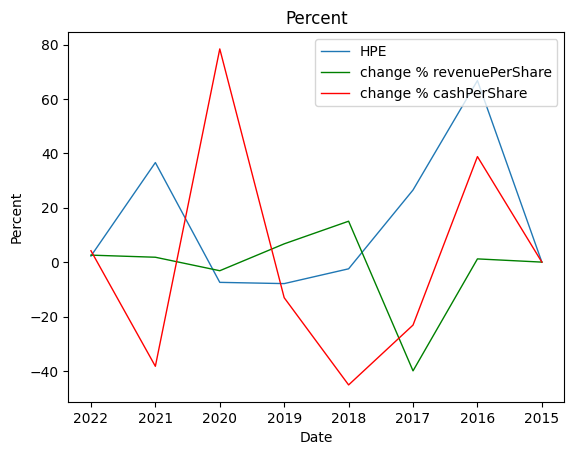

In [27]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [31]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])

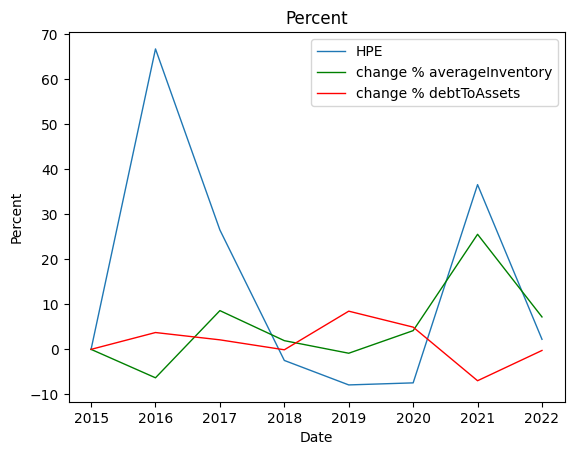

In [32]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

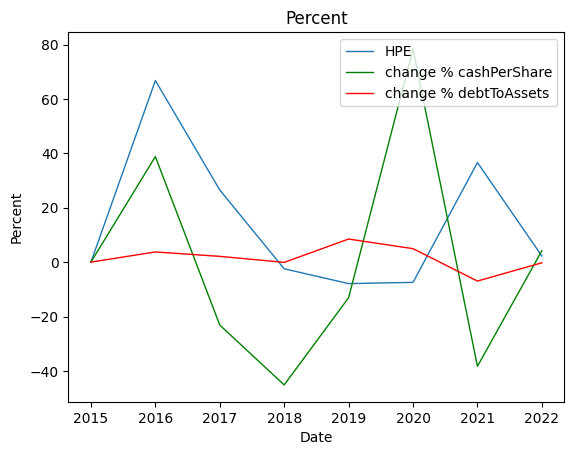

In [33]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()